# Importing libraries & dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/hollyringsak/Documents/6.1 KCA House Data'
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'kc_house_data_clean.csv'), index_col= False)

# Data Cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.head(20)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,1413158400000000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,1418083200000000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,1424822400000000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,1418083200000000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,1424217600000000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,1399852800000000000,1225000.0,4,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,1403827200000000000,257500.0,3,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,1421280000000000000,291850.0,3,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,1429056000000000000,229500.0,3,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,1426118400000000000,323000.0,3,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.shape

(21612, 22)

In [8]:
# Check for missing values
df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Check for duplicates
dups = df.duplicated()

In [10]:
dups.shape
#No duplicates found

(21612,)

/var/folders/13/511ckzmj56s_07l1n83g1xvw0000gn/T/ipykernel_44000/1384554536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25) # Shows extreme values
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

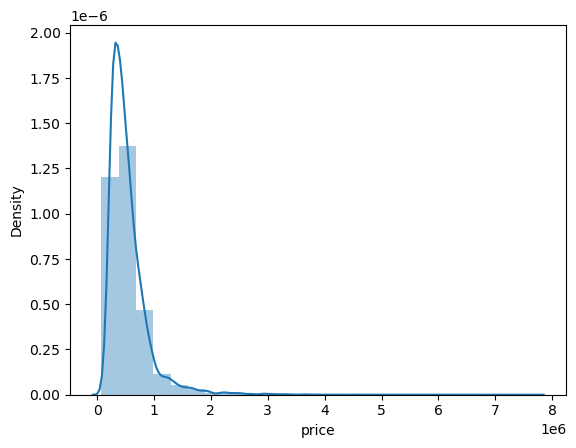

In [12]:
sns.distplot(df['price'], bins=25) # Shows extreme values

In [13]:
df['price'].mean() # Check the mean

540083.5187858597

In [14]:
df['price'].median() # Check median

450000.0

In [15]:
df['price'].max() # Check max value

7700000.0

# Data prep for regression analysis

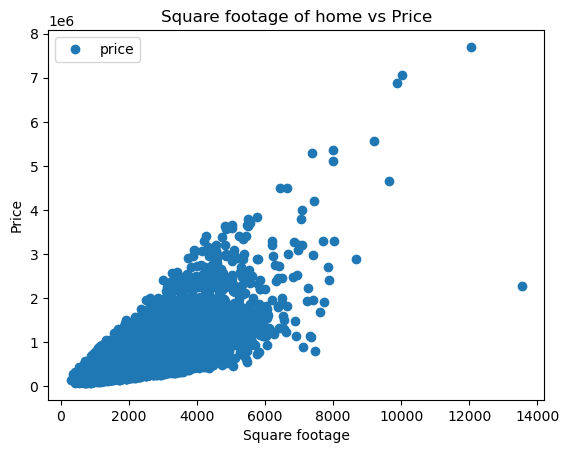

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living', y='price',style='o') 
plt.title('Square footage of home vs Price')  
plt.xlabel('Square footage')  
plt.ylabel('Price')  
plt.show()

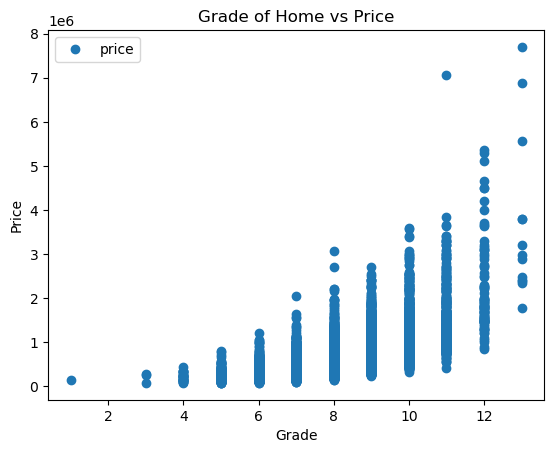

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'grade', y='price',style='o') 
plt.title('Grade of Home vs Price')  
plt.xlabel('Grade')  
plt.ylabel('Price')  
plt.show()

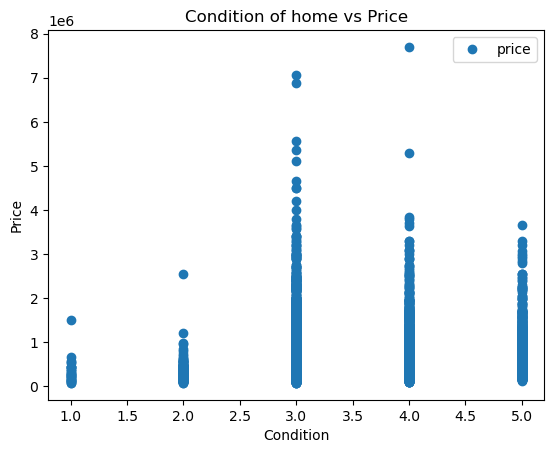

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'condition', y='price',style='o') 
plt.title('Condition of home vs Price')  
plt.xlabel('Condition')  
plt.ylabel('Price')  
plt.show()

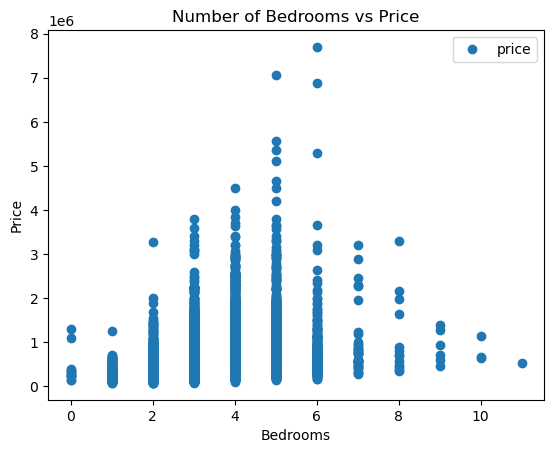

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'bedrooms', y='price',style='o') 
plt.title('Number of Bedrooms vs Price')  
plt.xlabel('Bedrooms')  
plt.ylabel('Price')  
plt.show()

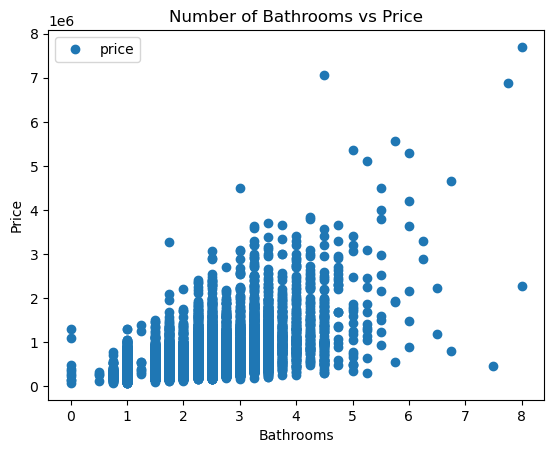

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'bathrooms', y='price',style='o') 
plt.title('Number of Bathrooms vs Price')  
plt.xlabel('Bathrooms')  
plt.ylabel('Price')  
plt.show()

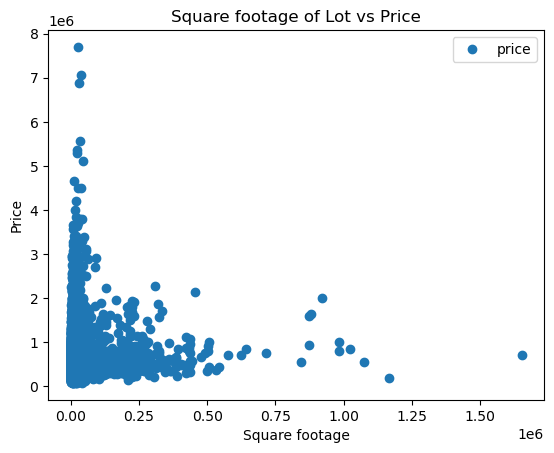

In [39]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_lot', y='price',style='o') 
plt.title('Square footage of Lot vs Price')  
plt.xlabel('Square footage')  
plt.ylabel('Price')  
plt.show()

## Hypothesis: The higher the square footage the more expensive the home

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [19]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [21]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [23]:
# Create a regression object.

regression = LinearRegression()

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

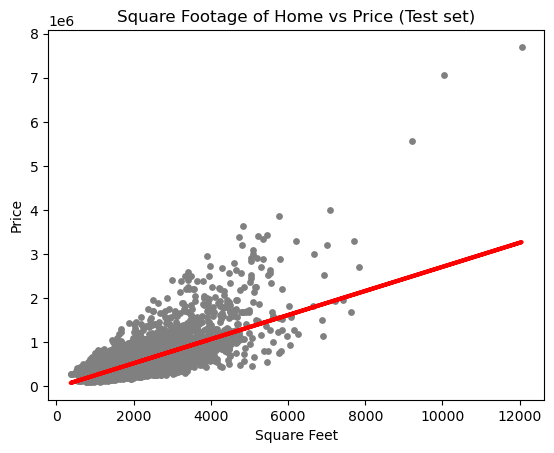

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Square Footage of Home vs Price (Test set)')
plot_test.xlabel('Square Feet')
plot_test.ylabel('Price')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[273.70843969]]
Mean squared error:  72796296390.32614
R2 score:  0.5057892303219628


In [40]:
# Large rmse & low R2 score indictating an inaccurate model

In [29]:
y_predicted

array([[1028568.56753501],
       [ 319663.70874696],
       [ 908136.85407295],
       ...,
       [ 513996.70092438],
       [1105206.93064723],
       [ 576949.64205228]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,900000.0,1.028569e+06
1,405000.0,3.196637e+05
2,780000.0,9.081369e+05
3,379950.0,6.842434e+05
4,1061600.0,7.877051e+05
5,627000.0,5.249450e+05
6,279000.0,5.358934e+05
7,453000.0,4.674663e+05
8,290000.0,3.689312e+05
9,792000.0,8.780289e+05


In [41]:
# Prediction not accurate to the actual, indicating an inaccurate model

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[273.70843969]]
Mean squared error:  66507995357.54318
R2 score:  0.4860368981218999


In [ ]:
# Large rmse & low R2 score indictating an inaccurate model

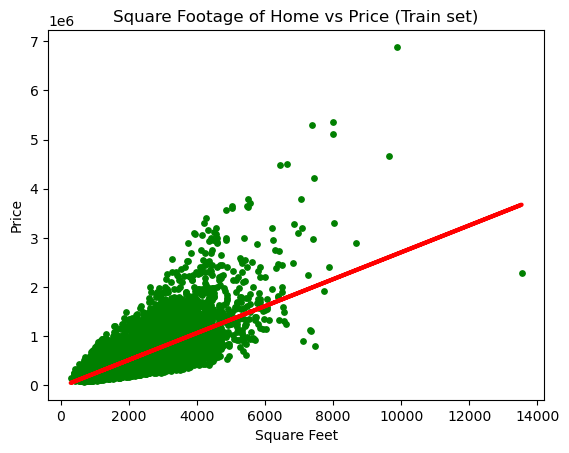

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Square Footage of Home vs Price (Train set)')
plot_test.xlabel('Square Feet')
plot_test.ylabel('Price')
plot_test.show()

## The model did not perform very well. I believe there is a correlation between the 2 factors, along with other variables. There seems to be a stronger relationship between smaller homes and lower price, but larger homes at a higher price are less predictable.

# Hypothesis: The higher the grade of the home, the higher the price

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['grade'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [43]:
X

array([[7],
       [7],
       [6],
       ...,
       [7],
       [8],
       [7]])

In [44]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [45]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [46]:
# Create a regression object.

regression = LinearRegression()

In [47]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

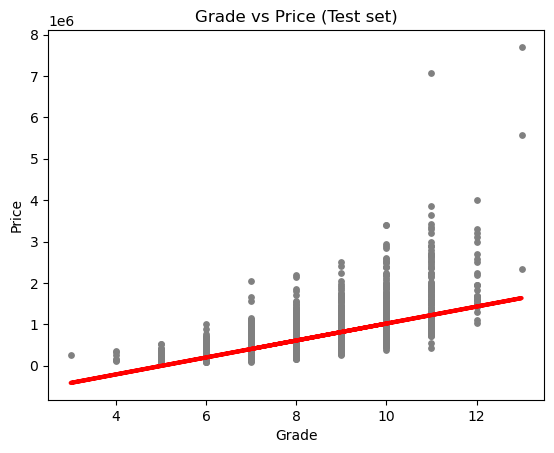

In [49]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Grade vs Price (Test set)')
plot_test.xlabel('Grade')
plot_test.ylabel('Price')
plot_test.show()

In [50]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [51]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[204864.54620207]]
Mean squared error:  82074237389.33324
R2 score:  0.4428017077485473


In [52]:
# Large rmse and low r2 score indicate inaccurate model

In [53]:
y_predicted

array([[1018820.82437131],
       [ 404227.18576511],
       [ 813956.27816924],
       ...,
       [ 609091.73196718],
       [1018820.82437131],
       [ 404227.18576511]])

In [54]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,900000.0,1.018821e+06
1,405000.0,4.042272e+05
2,780000.0,8.139563e+05
3,379950.0,6.090917e+05
4,1061600.0,1.018821e+06
5,627000.0,6.090917e+05
6,279000.0,4.042272e+05
7,453000.0,4.042272e+05
8,290000.0,4.042272e+05
9,792000.0,1.018821e+06


In [55]:
# Prediction not accurate to Actual

In [56]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [57]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [58]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[204864.54620207]]
Mean squared error:  71622205128.32294
R2 score:  0.44651510674456985


In [ ]:
# Large rmse, low r2, poor model

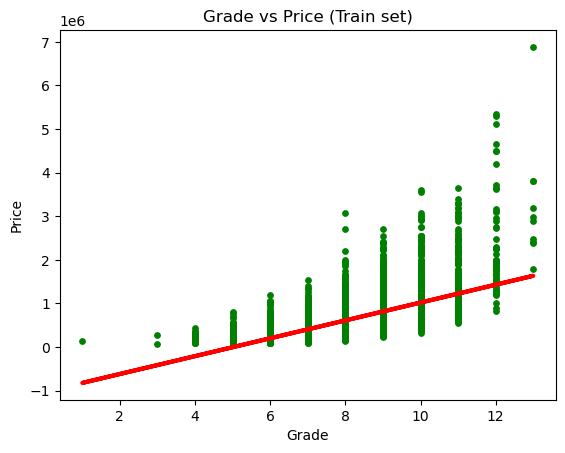

In [59]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Grade vs Price (Train set)')
plot_test.xlabel('Grade')
plot_test.ylabel('Price')
plot_test.show()

## This model also didn't perform well. Although there is a possible positive correlation these models are not accurate at predicting the outcome.